In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd
!ls drive/MyDrive/KNN_Image_Classifier_Datasets/Eurasian_Eagle_Owl/Train

/content
Eurasian_Eagle_Owl_001.png  Eurasian_Eagle_Owl_021.png	Eurasian_Eagle_Owl_041.png
Eurasian_Eagle_Owl_002.png  Eurasian_Eagle_Owl_022.png	Eurasian_Eagle_Owl_042.png
Eurasian_Eagle_Owl_003.png  Eurasian_Eagle_Owl_023.png	Eurasian_Eagle_Owl_043.png
Eurasian_Eagle_Owl_004.png  Eurasian_Eagle_Owl_024.png	Eurasian_Eagle_Owl_044.png
Eurasian_Eagle_Owl_005.png  Eurasian_Eagle_Owl_025.png	Eurasian_Eagle_Owl_045.png
Eurasian_Eagle_Owl_006.png  Eurasian_Eagle_Owl_026.png	Eurasian_Eagle_Owl_046.png
Eurasian_Eagle_Owl_007.png  Eurasian_Eagle_Owl_027.png	Eurasian_Eagle_Owl_047.png
Eurasian_Eagle_Owl_008.png  Eurasian_Eagle_Owl_028.png	Eurasian_Eagle_Owl_048.png
Eurasian_Eagle_Owl_009.png  Eurasian_Eagle_Owl_029.png	Eurasian_Eagle_Owl_049.png
Eurasian_Eagle_Owl_010.png  Eurasian_Eagle_Owl_030.png	Eurasian_Eagle_Owl_050.png
Eurasian_Eagle_Owl_011.png  Eurasian_Eagle_Owl_031.png	Eurasian_Eagle_Owl_051.png
Eurasian_Eagle_Owl_012.png  Eurasian_Eagle_Owl_032.png	Eurasian_Eagle_Owl_052.png
Eurasia

In [ ]:
import pandas as pd
import numpy as np
import os
import math
import torch
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from skimage.io import imread, imshow
from sklearn import preprocessing as p

Length of img_list is: 60
Length of img_list2 is: 60
Value of total_imgs is: 120


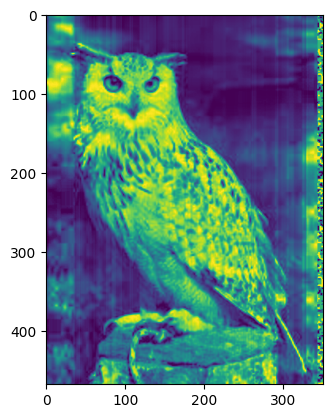

In [ ]:
IMAGE_DATA = "drive/MyDrive/KNN_Image_Classifier_Datasets/"
OWL_IMAGE_TRAIN = IMAGE_DATA + "Eurasian_Eagle_Owl/Train"
OWL_IMAGE_TEST = IMAGE_DATA + "Eurasian_Eagle_Owl/Test"
NIGHTHAWK_IMG_TRAIN = IMAGE_DATA + "Nighthawk/Train"
NIGHTHAWK_IMG_TEST = IMAGE_DATA + "Nighthawk/Test"

#Transform all images to fixed dimension of 500x332
min_max_scaler = p.MinMaxScaler()
image = Image.open(OWL_IMAGE_TRAIN + "/Eurasian_Eagle_Owl_001.png")
test_img = Image.open(OWL_IMAGE_TEST + "/Eurasian_Eagle_Owl_049.png")
hawk_img = Image.open(NIGHTHAWK_IMG_TRAIN + "/Nighthawk_0004_84011.jpg")
hawk_test = Image.open(NIGHTHAWK_IMG_TEST + "/Nighthawk_0003_82827.jpg")
img_list = [x for x in os.listdir(OWL_IMAGE_TRAIN)]
img_list2 = [x for x in os.listdir(NIGHTHAWK_IMG_TRAIN)]
total_imgs = len(img_list) + len(img_list2)
print("Length of img_list is:", len(img_list))
print("Length of img_list2 is:", len(img_list2))
print("Value of total_imgs is:", total_imgs)
image = image.convert("L")
normalizedData = min_max_scaler.fit_transform(image)
plt.imshow(normalizedData)

In [ ]:
def data_Preprocess(dir):
  img_list = [num_img for num_img in os.listdir(IMAGE_DATA + dir)]
  images_array = []
  for i in range(len(img_list)):
    image = Image.open(IMAGE_DATA + dir + img_list[i])
    image = image.convert("L")#convert image to black and white image
    image = image.resize((650, 650))
    image = min_max_scaler.fit_transform(image)#normalize the image using Min-Max Scalar
    image_arr = np.asarray(image)#convert image to numpy array of the images pixel values
    image_arr = image_arr.flatten()#flatten the image to dimension (1x166000) thus it'll be just 1 row of 166000 pixel values
    images_array.append(image_arr)
  images_array = np.asarray(images_array)
  return images_array

In [ ]:
class NearestNeighbor:
  def __init__(self):
    pass

  #Memorize all training data
  def train(self, X, y):
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    num_test = X.shape[0]
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
    for i in range(num_test):#for each test image
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis=1)#calculate euclidean distance to find which training image the ith test image will be closest to
      min_index = np.argmin(distances)#get index of image with smallest distance
      Ypred[i] = self.ytr[min_index]#predict the label of the ith test image
    return Ypred

In [ ]:
owl_list = data_Preprocess("Eurasian_Eagle_Owl/Train/")
owl_test = data_Preprocess("Eurasian_Eagle_Owl/Test/")
hawk_list = data_Preprocess("Nighthawk/Train/")
hawk_test = data_Preprocess("Nighthawk/Test/")
y = np.ones(len(owl_list))
y2 = np.zeros(len(hawk_list))#Eurasian Eagle Owl = 1 and Nighthawk = 0
y_true = np.concatenate((y, y2), axis=None)
final_list = np.concatenate((owl_list, hawk_list))#merges owl_list and hawk_list to make array of pixel values of shape (120, 166000)
test_list = np.concatenate((owl_test, hawk_test))#merges owl_test and hawk_test to make array of pixel values of shape (24, 166000)
y_testT1 = np.ones(len(owl_test))
y_testT2 = np.zeros(len(hawk_test))
y_testT = np.concatenate((y_testT1, y_testT2), axis=None)
final_list[0,:]

array([0.25892857, 0.26363636, 0.27358491, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
neigh = NearestNeighbor
neigh.train(neigh, final_list, y_true)
y_pred = neigh.predict(neigh, test_list)
print("Value of y_pred is:", y_pred, "with shape", y_pred.shape)
print("Value of y_testT is", y_testT, "with shape", y_testT.shape)

Value of y_pred is: [1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.] with shape (24,)
Value of y_testT is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] with shape (24,)


In [ ]:
confuse_mat = {
    "TP": 0, #predicted Eurasian Eagle Owl or 1 and image is actually Eurasian Eagle Owl or 1
    "TN": 0, #predicited Nighthawk or 0 and image is actually Nighthawk or 0
    "FP": 0, #predicted Eurasian Eagle Owl or 1 and image is actually Nighthawk or 0
    "FN": 0 #predicted Nighthawk or 0 and image is actually Eurasian Eagle Owl or 1
}
for i in range(len(y_pred)):
  if y_pred[i] == 1 and y_testT[i] == 1:
    confuse_mat["TP"] += 1
  elif y_pred[i] == 0 and y_testT[i] == 0:
    confuse_mat["TN"] += 1
  elif y_pred[i] == 1 and y_testT[i] == 0:
    confuse_mat["FP"] += 1
  else:
    confuse_mat["FN"] += 1
print(confuse_mat)
accuracy = (confuse_mat["TP"] + confuse_mat["TN"]) / (confuse_mat["TP"] + confuse_mat["TN"] + confuse_mat["FP"] + confuse_mat["FN"])
precision = confuse_mat["TP"] / (confuse_mat["TP"] + confuse_mat["FP"])
recall = confuse_mat["TP"] / (confuse_mat["TP"] + confuse_mat["FN"])
f1_score = 2 * (recall * precision) / (recall + precision)
print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Recall is:", recall)
print("F1-Score is:", f1_score)

{'TP': 8, 'TN': 8, 'FP': 4, 'FN': 4}
Accuracy is: 0.6666666666666666
Precision is: 0.6666666666666666
Recall is: 0.6666666666666666
F1-Score is: 0.6666666666666666
